# "Run Girl Run": Visualising My Strava Activities with APIs

## Introduction

The purpose of this project is to explore my sports activity patterns througohut the last year. I like to go for long runs, practice sports such as tennis and padel, and sometimes go to the gym when it's rainy outside. The platform that I use to keep track of my physical activities is Strava, an American internet service for tracking physical exercise which also has the features of a social media. It's a nice platform where I can look back at my average pace of my fast runs, look at the maps of my long runs, and get motivated by receiving kudos from my friends and vice versa!

In order to analyse my activity on my JupyterLab, I need to scrape the data from my Strava account (through the APIs they provide), and download it locally. I read [this](https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde) online article which helped me in the process of downloading the necessary tools to test Strava APIs, getting access and refresh tokens, and finally getting the data with Python. Would highly recommend to anybody who's new to APIs and would like to give it a go. 

Once I've done that, I then started exploring my data through publicly available libraries such as Pandas and NumPy. After having cleansed my data, I aimed at answering the following questions:

- What's the most frequent activity that I've performed in the past six months?
- What's the most common run distance I've performed in the past few years?
- Has my average pace decreased during my fast, 5km runs throughout the past year?
- In which country/ county did I exercise the most in the past years?

## Getting our Data

In [1]:
import calendar
from datetime import datetime
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns

In [2]:
from utils import (
    getting_access_and_refresh_tokens, 
    get_dataset,
    convert_to_hhmmss,
    start_date_to_y_m_d_t,
    converting_num_months_to_strings,
    sorting_values_by_year,
    converting_metres_into_kms,
    creating_a_total_column,
    plotting_table_into_grouped_bar_chart
)

In [3]:
access_token = getting_access_and_refresh_tokens(
    client_id="111330",
    client_secret='db75227de1fa38f856b4ce323affe796687943ef',
    refresh_token='186b85fbbff3960fcfb5ec338fac12cb356611ce',
)

Requesting Token...



In [4]:
# Getting the dataset 
df_original = get_dataset(access_token) # applying the get_dataset function 

In [5]:
# Creating a copy of the original dataset 
df = df_original.copy()

## Cleaning the data

In [6]:
# Converting moving_time into hours, minutes, and seconds
df["moving_time"] = df["moving_time"].apply(convert_to_hhmmss)

In [7]:
# Splitting the 'start_date' into years, months, days, and times 
df[["year", "month", "day", "time"]] = df["start_date"].apply(start_date_to_y_m_d_t)

In [8]:
# Dropping the start_date column
df.drop(columns=['start_date'], inplace=True) # Dropping the original 'start_date' column 

In [9]:
# Converting number of months into names of the month 
df = converting_num_months_to_strings(df)

In [10]:
# Sorting all values by year
df = df.sort_values("year")

In [11]:
# Replacing 'Weight Training' with 'Workout' to reduce the amount of 'sport_type'(s)
df['sport_type'] = df['sport_type'].replace('WeightTraining', 'Workout')

In [12]:
# Converting the distance column from metres into kms
df = converting_metres_into_kms(df)

## Visualising our Data

#### Sport by Month Frequency Table

Let's now answer the first of our research questions. What's the most frequent activity that I've performed in the past six months?

In [13]:
# Filtering data based on the 'year' column
year_to_filter = 2023
filtered_df = df[df['year'] == year_to_filter]

In [14]:
# Calculating the frequency of sports practiced by month 
frequency_table = filtered_df.groupby(['sport_type', 'month']).size().unstack(fill_value=0) # adding size to count the occurrences. filling missing values with 'unstack' 

In [15]:
frequency_table

month,January,February,March,April,May,June,July,August,September,October,November,December
sport_type,,,,,,,,,,,,
Badminton,0,0,0,0,0,0,0,1,0,0,0,0
HighIntensityIntervalTraining,0,0,0,0,0,0,0,0,1,2,0,0
Hike,0,0,0,0,0,0,0,0,0,1,0,0
Racquetball,0,0,0,0,0,0,2,1,0,0,0,0
Ride,0,0,1,0,0,0,0,3,4,0,0,0
Run,5,10,11,11,13,3,7,3,5,0,1,0
Swim,0,0,0,0,0,0,0,1,2,0,0,0
Tennis,0,0,0,0,0,0,0,4,1,1,0,0
Walk,0,0,1,0,0,0,0,1,0,0,0,0


Here's our first frequency table. It would be easier to be able to assess which sport is the one I've practiced more. We'll do that by creating a new column named 'total' and sort all values from biggest to smallest. 

In [16]:
# Creating a 'total' column to sort all values from biggest to smallest  
frequency_table = creating_a_total_column(frequency_table)

The most frequent activity is running. Let's now use this frequency table to create a grouped bar chart.

month,January,February,March,April,May,June,July,August,September,October,November,December
sport_type,,,,,,,,,,,,
Run,5,10,11,11,13,3,7,3,5,0,1,0
Workout,0,0,0,0,0,0,0,3,5,7,3,0
Ride,0,0,1,0,0,0,0,3,4,0,0,0
Tennis,0,0,0,0,0,0,0,4,1,1,0,0
HighIntensityIntervalTraining,0,0,0,0,0,0,0,0,1,2,0,0
Racquetball,0,0,0,0,0,0,2,1,0,0,0,0
Swim,0,0,0,0,0,0,0,1,2,0,0,0
Walk,0,0,1,0,0,0,0,1,0,0,0,0
Badminton,0,0,0,0,0,0,0,1,0,0,0,0


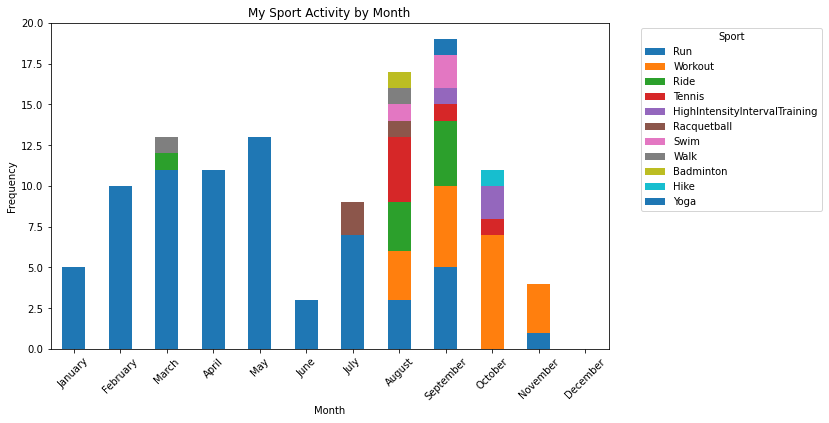

In [17]:
# Plotting a frequency table into a grouped bar chart
frequency_table = plotting_table_into_grouped_bar_chart(frequency_table)
frequency_table

There is a bit of cleansing here to do. For example, I have practiced a lot of padel in the past few months. However, Strava doesn't have 'padel' in the list of sports, so I have labelled it as either a 'workout' or as 'tennis'. A way for me to go and check is to look at the title of the activity, since I always put 'padel match' as a title when I played padel. In that way, I will see which activities among 'tennis' and 'workout' are actually 'padel'.

In [18]:
# Selecting only padel activities through regex
pattern = r'(?i)padel' # making the regex case-insensitive with '(?i)'

# Selecting padel words through the str.contains function
padel_df = df[df['name'].str.contains(pattern, regex=True)]

padel_df

,resource_state,athlete,name,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date_local,...,max_watts,weighted_average_watts,kilojoules,device_watts,average_temp,year,month,day,time,distance_km
129,2,"{'id': 93529569, 'resource_state': 1}",Night Padel,02:00:00,7200,0.0,Run,Run,7833380773,2022-09-18T16:00:08Z,...,NaN,NaN,NaN,NaN,NaN,2022,September,18,16:00:08,4.0
25,2,"{'id': 93529569, 'resource_state': 1}",Padel Tournament🍳,01:07:22,4076,0.0,Workout,Workout,9850493916,2023-09-14T21:01:57Z,...,NaN,NaN,NaN,NaN,NaN,2023,September,14,20:01:57,3.0
20,2,"{'id': 93529569, 'resource_state': 1}",Padel Tournament🔥,01:10:19,4219,0.0,Workout,Workout,9895210761,2023-09-21T21:00:00Z,...,NaN,NaN,NaN,NaN,NaN,2023,September,21,20:00:00,3.0
18,2,"{'id': 93529569, 'resource_state': 1}",Padel Social Playmatch,01:17:54,5113,0.0,Workout,Workout,9906166996,2023-09-23T14:30:23Z,...,NaN,NaN,NaN,NaN,NaN,2023,September,23,13:30:23,3.0
17,2,"{'id': 93529569, 'resource_state': 1}",Padel Tournament,01:18:31,4889,0.0,Workout,Workout,9914268030,2023-09-24T16:10:45Z,...,NaN,NaN,NaN,NaN,NaN,2023,September,24,15:10:45,3.0
15,2,"{'id': 93529569, 'resource_state': 1}",Advanced Padel Match,01:05:54,4043,0.0,Workout,Workout,9948245528,2023-09-30T10:17:29Z,...,NaN,NaN,NaN,NaN,NaN,2023,September,30,09:17:29,3.0
14,2,"{'id': 93529569, 'resource_state': 1}",Mixed Padel Tournament,01:44:42,6562,0.0,Workout,Workout,9956451091,2023-10-01T13:17:17Z,...,NaN,NaN,NaN,NaN,NaN,2023,October,1,12:17:17,4.0
12,2,"{'id': 93529569, 'resource_state': 1}",Padel Match,01:49:09,6718,16.3,Workout,Workout,9977839995,2023-10-04T20:25:13Z,...,NaN,NaN,NaN,NaN,NaN,2023,October,4,19:25:13,9.0
11,2,"{'id': 93529569, 'resource_state': 1}",Padel Match,00:38:46,3013,0.0,Workout,Workout,9984124887,2023-10-05T21:19:05Z,...,NaN,NaN,NaN,NaN,NaN,2023,October,5,20:19:05,2.0
10,2,"{'id': 93529569, 'resource_state': 1}",Padel Match,01:07:50,4496,0.0,Workout,Workout,9994565369,2023-10-07T11:47:24Z,...,NaN,NaN,NaN,NaN,NaN,2023,October,7,10:47:24,3.0


In [19]:
df.loc[:, 'sport_types'] = 'Padel'

It looks like runs are the most frequent activities. The month with the highest number of runs is May. This might be because I was training for a Trail Half Marathon which took place at the beginning of June. This could also explain why the month with the lowest amount of run activities was June, since I was going through post-race recovery. We can also observe the diversity in sports which took place in August. This might be because of the nice weather thus the multiple activities which can be practiced outdoor. 

## Exploring Runs

Let's now explore the runs. More specifically, it would be good to explore how my distance in runs has changed throughout the past few years. As for running, I have actually started way before January 2023, so now I'm going to use the original dataframe to also include all the runs I did before 2023. This will help us answer our second research question: "What's the most common run distance I've performed in the past few years?"

In [ ]:
# Filtering the dataframe to only select runs activities 
run_df = df[df['sport_type'] == 'Run']

In [ ]:
# Defining bin intervals for my run's distances
bins = [0, 5, 10, 15, 20, 25, 30]

# Creating bins using the cut function
run_df['distance_bins'] = pd.cut(run_df['distance_km'], bins=bins, labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"])

In [ ]:
# Calculating basic statistics
mean_distance = run_df['distance_km'].mean()
median_distance = run_df['distance_km'].median()
std_distance = run_df['distance_km'].std()

In [ ]:
# Plotting a histogram
plt.figure(figsize=(10,6))
plt.hist(run_df['distance_km'], bins=bins, edgecolor='Blue', alpha=0.7)

# Adding vertical lines for mean and median
plt.axvline(mean_distance, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_distance, color='black', linestyle='dashed', linewidth=1, label='Median')

# Setting labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of my Run\'s Distances')
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
# Creating a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(run_df['distance_km'], shade=True)

# Set labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of My Run\'s Distances')

# Display the plot
plt.show()

As shown by the plots above, the distribution of my run's distances is positively skewed. The mean lies between 5 and 10, whereas the median is on 5km. The mode is also on 5km, therefore, the most common type of distance ran in the past few years is the 5km one. This might be because it's been more convenient for me to go for a quick 5km run during my lunch break rather than going for a long, 30km run - which happened on very rare weekends. 

It might be worth exploring my 5km runs further to check if my average time has decreased at all, since the 5km runs are the ones which I've been practicing the most. This will help us answer our third research question: "Has my average pace decreased during my fast, 5km runs throughout the past year?"

#### Exploring 5km Runs

In [ ]:
# Filtering runs into 5km runs only 
short_run_df = run_df[run_df['distance_km'] == 5]
short_run_df = short_run_df.sort_values("date")

In [ ]:
# Computing my average pace 
short_run_df['average_pace'] = 1 / (short_run_df['average_speed'] * 60 / 1000) # converting the average speed from m/sec to km/min to compute pace
short_run_df = short_run_df[(short_run_df['average_pace'] < 10) & (short_run_df['average_pace'] > 3)] # filtering out outliers 

In [ ]:
# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(short_run_df['date'], short_run_df['average_pace'], marker='o', linestyle='-', color='b')

As we assumed, it seems like my average pace has been decreasing throughout the past year. From November 2022 to mid-February 2023, there has been a sharp decline in average pace. This might be because I have started running with friends who gave some constructive feedback on how to improve my run, which in turn made me run faster. However, around July and August, there are two outliers. One of them is due to a disinterested run that I logged for the sake of running, whereas the other one is due to a low mood run that I logged after an argument I had with my boyfriend! Despite these two outliers, from mi September 2023, there has been a repetitive rhythm of ups and downs throughout the rest of the year, with average paces steadily oscillating between 4:30 /km and 5:00 /km. This might have been because I set myself the goal of performing my running performance for the Trail Half Marathon in June, thus aimed at running my 5km runs better and faster.

## Exploring Routes

Now that we've created some charts to analyse my running data, it would be good to look at the routes of my runs and cycling activities on a map. Strava routes are stored in GPX files (i.e., GPS Exchange Format), a standard file format often used to store and exchange GPS data and tracks (e.g., longitude, latitude, and elevation data). To bulk export my files, I used [this](https://support.strava.com/hc/en-us/articles/216918437-Exporting-your-Data-and-Bulk-Export#h_01GG58HC4F1BGQ9PQZZVANN6WF) article found on the Strava webpage, where I could learn how to export an archive of my account. Since GPX Files are usually packed in a zip file, I coded a way to unzip the zipped files and keep the non-zipped files as they are, to then store them in a separate GPX Files directory before using them. This will eventually help us answer our fourth and last research question: "In which country/ county did I exercise the most in the past years?"

#### Moving GPX Files into a GPX Files Directory

In [ ]:
# Importing the necessary libraries
import gzip
import shutil
import os

In [ ]:
# Creating a directory of the activities 
activities_directory = '/Users/giorgiadimiccoli/Desktop/export_93529569/activities'

# Creating a new directory to store all the gpx files 
gpx_files = '/Users/giorgiadimiccoli/Desktop/export_93529569/gpx_files'

In [ ]:
# Looping over the 'activities' directory to extract the gpx files and cleanse the gz files 
for file in os.listdir(activities_directory): # listing all files in the 'activities' directory with the listdir() function
    
    # Creating the file path by combining its name to the 'activities_directory'
    file = activities_directory + "/" + file
    
    # Checking if the data in the directory is a file
    if os.path.isfile(file):
    
    # Checking if the file has a .fit extension
        if file.endswith('.fit'):
    
    # Ignoring all files which contain a .fit extension
            continue 
    
    # Checking if the file has both a .gpx and .gz extension    
        if '.gpx' in file and file.endswith('.gz'): # Not using the 'endswith' function since some files contain .gpx but may end with .gz
    
    # Reading in the bytes of the file 
            with gzip.open(file, 'rb') as f_in:
    
    # Writing the bytes of the file and removing the '.gz' extension 
                with open(file.replace("activities", "gpx_files").replace(".gz", ""), 'wb') as f_out:
    
    # Copying the content of the file with shutil
                    shutil.copyfileobj(f_in, f_out) 
    
    # Checking if the file has a .gpx and does not have a .gz extension
        if '.gpx' in file and not file.endswith('.gz'):
    
    # Moving the file from the 'activities' directory to the 'gpx_files' directory 
            shutil.move(file, file.replace("activities", "gpx_files"))

Now that we've cleansed and stored all the GPX files in a new directory, we can iterate through each file path and turn them into a dataframe to better manipulate and analyse each activity's track.

In [ ]:
# Creating a function that takes in a file path and returns a dataframe
def gpx_files_to_df(file_path):
    
    # Parsing the gpx file 
    gpx = gpxpy.parse(open(file_path))   
    
    # Creating an empty list for each info we want to store in the df 
    lats = []
    longs = []
    elevs = []
    times = []
    
    # Iterating through each point in the segment of the track of the gpx file
    for point in gpx.tracks[0].segments[0].points:
    
    # Appending each info from the point to the correspondent empty list
        lats.append(point.latitude)
        longs.append(point.longitude)
        elevs.append(point.elevation)
        times.append(point.time)
        
    # Creating a dataframe with the information as names of the columns 
    my_df = pd.DataFrame.from_dict(
    {
        "longitude": longs,
        "latitude": lats,
        "elevation": elevs,
        "time": times,
    }
    )
    return my_df

In [ ]:
import gpxpy

# Creating an empty list of dataframes
list_of_dfs = []

# Looping over each file
for file in os.listdir(gpx_files): # Listing all the files in the 'gpx_files' directory
    # Creating the file path by combining its name to the 'gpx_files'
    file = gpx_files + "/" + file
    # Applying the 'gpx_files_to_df' function to the file and assigning the result to 'dfed_file'
    dfed_file = gpx_files_to_df(file)
    # Appending all the 'dfed_file'(s) to the list of empty dataframes 
    list_of_dfs.append(dfed_file)

Now it's time to create our maps! Let's import folium, a package that allows us to create interactive geographic visualisations. 
Since having the maps in the Jupyter Notebook would take too much memory, I have created the maps first, took their screenshots, and then removed them from the notebook and loaded up the screenshots. 

#### Creating Maps and Strava Routes

In [ ]:
# Using geospatial analysis to visualize my Strava routes with the folium package
import folium

route_map = folium.Map( # creating a map through folium.Map 
    location=[51.752457, -1.230000], # giving coordinates 
    zoom_start=13, # setting where the zoom starts 
    tiles='OpenStreetMap', # setting the map tile 
    width='100%', # choosing the width of the map 
    height='100%' # choosing the height of the map 
)

In [ ]:
# Creating a map of the routes 
for df in list_of_dfs:
    for _, row in df.iterrows(): # Iterating through each row in the first dataframe from the list of dataframes 
        folium.CircleMarker( # dding a circle marker at each longitude and latitude combination
            location=[row['latitude'], row['longitude']],
            radius=3, # setting the circle radius to 3 
        ).add_to(route_map) # adding the markers to the map 

In [ ]:
# Connecting circle markers in a polygon line to properly represent the route 
route_map = folium.Map( # creating a map through folium.Map 
    location=[51.752457, -1.230000], # giving coordinates of Oxford to start with 
    zoom_start=13, # setting where the zoom starts 
    tiles='OpenStreetMap', # adjusting the map tile to make the route stand out more 
    width='100%', # choosing the width of the map 
    height='100%' # choosing the height of the map 
)

# Creating a nested for loop to connect the circle markers
for df in list_of_dfs: # iterating through the list of dataframes
    for row in df: # looping through each row in the dataframe we are iterating through 
        coordinates = [tuple(x) for x in df[['latitude', 'longitude']].to_numpy()] # Extracting geolocation info as a list of tuples 
        folium.PolyLine( # Creating the polylines with the list of tuples
            coordinates,
            weight=3 # choosing the line thickness in pixels
        ).add_to(route_map) # adding them back to the route_map 

#### Showing my Strava Routes

In [ ]:
# Getting the current working directory (root directory)
root_directory = os.getcwd()

# Iterating over all files in the root directory
for filename in os.listdir(root_directory):
    # Checking if the file has an Open Street Map tile layer
    if "_openstreetmap_" in filename:
        # Displaying the Open Street Map images using IPython.display.Image
        img_path = os.path.join(root_directory, filename)
        display(Image(filename=img_path))

Here above, we can see the routes of my Strava activities on the maps of Exmoor and Snowdonia. 

To reduce as much noise as possible, we could use a different tile layer named `'CartoDBPositron'`. Let's apply it to the Oxfordshire map, since it's most probably the one with the highest activity density because I am currently living in Oxford.

In [ ]:
# Displaying a map with the tile layer 'CartoDBPositron'
display(Image(filename='oxf_map_card_screenshot.png'))

Let's also create a dark map with the tile layer `'CartoDBDark_Matter'`. Let's do that for the Cambridge data, since it has an interesting shape.

In [ ]:
# Displaying a map with the tile layer 'CartoDBDark_Matter'
display(Image(filename='cam_dark_map_screenshot.png'))

It looks like the majority of my activities in the past year has been performed the Oxfordshire county, which is the area where I'm currently living in. Some other activities have been performed in Exmoor and Wales due to trail half marathons, and in Cambridge where I used to live.

## Conclusion

The purpose of this project was to explore my physical exercise activities performed throughout the past few years. We scraped the data from my Strava account using the APIs they provide and downloaded the data locally to explore it, cleanse it, and analyse it. 

Here's what we've discovered so far:
    
- The most frequent activity that I've performed in the past six months was running. This might be because of my trainings for multiple half marathons. 
- The most common run distance I've performed in the past few years is the 5km distance. This is because I found it more convenient to run shorter distance due to a busy lifestyle. 
- My average pace decreased during my fast, 5km runs throughout the past year, with a constant up-and-down rhythm between 4:30 /km and 5:00 /km. A reason could be that I set myself the goal of improving my running performance for the Trail Half Marathon in June 2023, thus aimed at running my 5km runs better and faster.
- Oxfordshire, followed by Cambridgeshire and some areas of Exmoor and Wales, is the county where I exercised the most in the past years.

Here are the recommendations which could be used for further data exploration: 
- Design some time series visualisations to track my fitness progress over time, including metrics such as heart rate and calories burned. 
- Create a radar chart or parallel coordinate plots to compare my performance with the one of my partner or my friends across different statistical categories.
- Plot a chart to compare the rankings of different teams during padel tournaments based on performance metrics such as defense, offense, and/ or overall rating. 